### Student Information
Name: 蔡秉翰

Student ID: 107064527

GitHub ID: k52276hank

---

### Instructions

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

## New Data Visualizations

#### Positive Word Cloud of imdb dataset

In [15]:
# magic command 
%load_ext autoreload
%autoreload 2
%matplotlib inline

# package import 
import pandas as pd
import numpy as np
import nltk
import math
import matplotlib.pyplot as plt

from helpers import data_mining_helpers as dmh

# Prepare Dateset
list_source = ["imdb", "amazon_cells", "yelp"]
dict_df = {}
data_all = pd.DataFrame(columns=["text","score", "source"])

for i, source in enumerate(list_source):
    df_input = pd.read_table('sentiment labelled sentences/{}_labelled.txt'.format(source),  header=None, names=["text", "score"])
    dict_df[source] = df_input # data store respectively
    df_input["source"] = [source]*df_input.shape[0] # add column source to df_input
    data_all = data_all.append(df_input, ignore_index=True) # data store together 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# because we lose some data when use pandas to load imdb_labelled.txt, 
# we load the file by traditional method and transform to DataFrame.
list_text_imdb = []
list_score_imdb = []
with open("sentiment labelled sentences/imdb_labelled.txt", mode="r") as f:
    for line in f.readlines():
        each_text, each_score = line.strip().split('\t')
        
        list_text_imdb.append(each_text)
        list_score_imdb.append(int(each_score))

df_imdb = pd.DataFrame(
    data={
        "text":list_text_imdb, 
        "score":list_score_imdb, 
        "source":["imdb"]*len(list_text_imdb)})
dict_df["imdb"] = df_imdb
data_all.drop(data_all[data_all.source=="imdb"].index, inplace=True)
data_all = data_all.append(df_imdb, ignore_index=True)

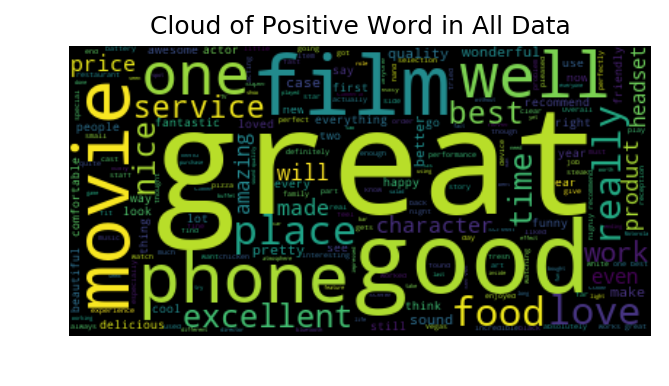

In [18]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(data_all['text'][data_all['score'] == 1].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Positive Word in All Data')
plt.show()

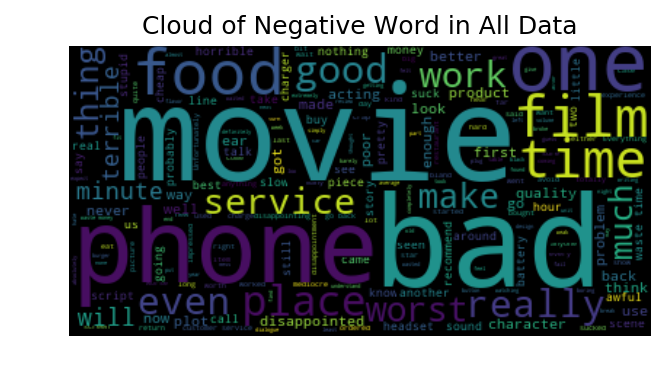

In [19]:
#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(data_all['text'][data_all['score'] == 0].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Negative Word in All Data')
plt.show()

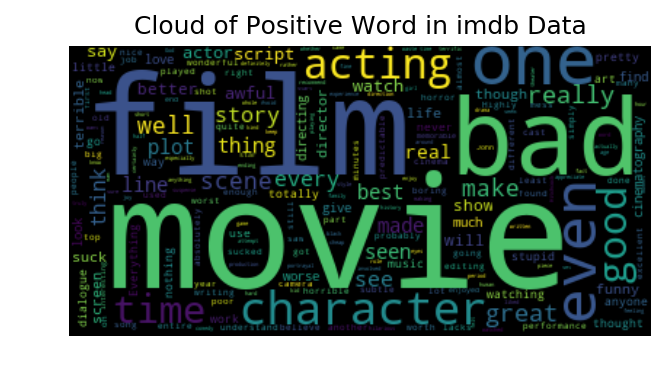

In [20]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(dict_df["imdb"]['text'][data_all['score'] == 1].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Positive Word in imdb Data')
plt.show()

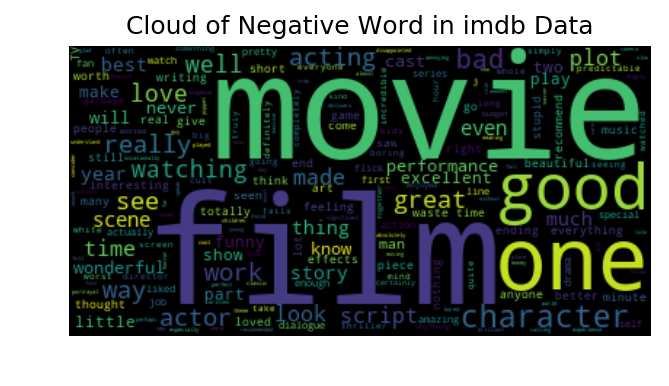

In [21]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(dict_df["imdb"]['text'][data_all['score'] == 0].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Negative Word in imdb Data')
plt.show()

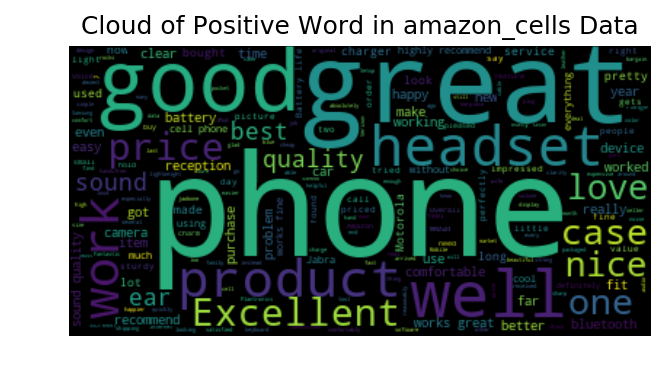

In [22]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(dict_df["amazon_cells"]['text'][data_all['score'] == 1].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Positive Word in amazon_cells Data')
plt.show()

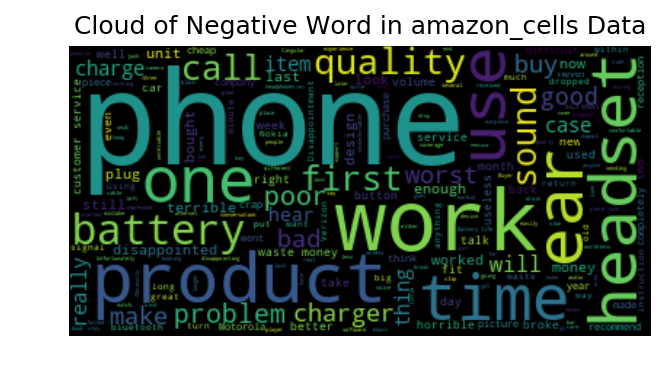

In [23]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(dict_df["amazon_cells"]['text'][data_all['score'] == 0].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Negative Word in amazon_cells Data')
plt.show()

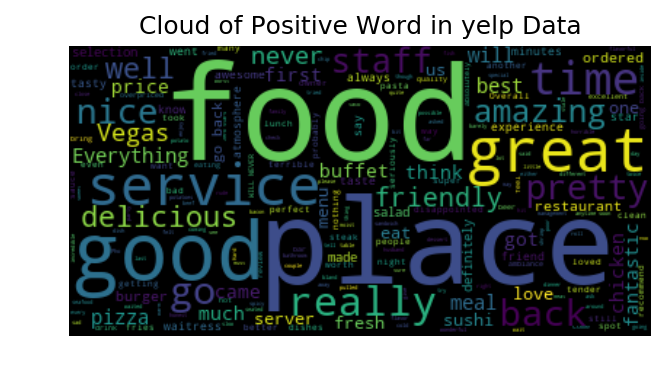

In [24]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(dict_df["yelp"]['text'][data_all['score'] == 1].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Positive Word in yelp Data')
plt.show()

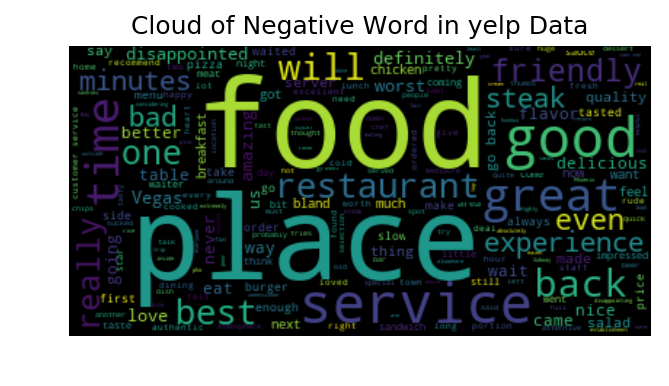

In [25]:
from wordcloud import WordCloud

#word cloud will create the clod of related words
word_cloud = WordCloud().generate(' '.join(dict_df["yelp"]['text'][data_all['score'] == 0].values.tolist()))
plt.figure(figsize=(5, 4), dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cloud of Negative Word in yelp Data')
plt.show()

## Feature Creation(TF-IDF)

#### Feature creation(TF-IDF) of imdb dataset

In [26]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import random

position_a = []

for i in range(5):
    position_a.append(random.randint(0, X_Tfid.shape[0]))
    print(i, "th sentance: ")
    print("Sentence A \n", "category:", X.category_name[position_a[i]], "\t index: ", position_a[i])
    print(X.text[position_a[i]], "\n")

    


##### Euclidean distance

In [33]:
# Calculate Euclidean Distance
def EuclideanD(x, y):
    if (len(x) == len(y)):
        result = 0
        for i in range(len(x)):
            result += (x[i] - y[i]) ** 2
        result = math.sqrt(result)
        return result
    else:
        return "size doesn't match"

###### > Frenquency

### Naive Bayes classifier with TF-IDF features

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score

In [50]:
x_train, x_test, y_train, y_test = train_test_split(
    dict_df['imdb']['text'], 
    dict_df['imdb']['score'], 
    test_size=0.3, 
    random_state=40,
    stratify=dict_df['imdb']['score'])

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
print('---imdb dataset---')

#count tfidf value
tfidf_value = tfidf_vect.fit_transform(dict_df['imdb']['text'])
print(tfidf_value.shape)

---imdb dataset---
(1000, 2700)


In [51]:
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train)
y_predict = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test, y_predict, average='macro')
print('---imdb dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test)
print('Accuracy: ',accuracy)


---imdb dataset---
Recall:  0.77
Accuracy:  0.77


In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    dict_df['amazon_cells']['text'], 
    dict_df['amazon_cells']['score'], 
    test_size=0.3, 
    random_state=40,
    stratify=dict_df['amazon_cells']['score'])

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
print('---amazon_cells dataset---')

#count tfidf value
tfidf_value = tfidf_vect.fit_transform(dict_df['amazon_cells']['text'])
print(tfidf_value.shape)

---amazon_cells dataset---
(1000, 2084)


In [53]:
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train)
y_predict = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test, y_predict, average='macro')
print('---amazon_cells dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test)
print('Accuracy: ',accuracy)

---amazon_cells dataset---
Recall:  0.8266666666666667
Accuracy:  0.8266666666666667


In [54]:
x_train, x_test, y_train, y_test = train_test_split(
    dict_df['yelp']['text'], 
    dict_df['yelp']['score'], 
    test_size=0.3, 
    random_state=40,
    stratify=dict_df['yelp']['score'])

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
print('---yelp dataset---')

#count tfidf value
tfidf_value = tfidf_vect.fit_transform(dict_df['yelp']['text'])
print(tfidf_value.shape)

---yelp dataset---
(1000, 2215)


In [55]:
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train)
y_predict = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test, y_predict, average='macro')
print('---yelp dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test)
print('Accuracy: ',accuracy)

---yelp dataset---
Recall:  0.79
Accuracy:  0.79


In [60]:
x_train, x_test, y_train, y_test = train_test_split(
    data_all['text'].tolist(), 
    data_all['score'].tolist(), 
    test_size=0.3, 
    random_state=40,
    stratify=data_all['score'])

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
print('---all dataset---')

#count tfidf value
tfidf_value = tfidf_vect.fit_transform(data_all['text'])
print(tfidf_value.shape)

---all dataset---
(3000, 6788)


In [61]:
clf = MultinomialNB(alpha=0.01)
clf.fit(tfidf_train.toarray(), y_train)
y_predict = clf.predict(tfidf_test.toarray())
recall = recall_score(y_test, y_predict, average='macro')
print('---all dataset---')
print('Recall: ',recall)
accuracy = clf.score(tfidf_test.toarray(),y_test)
print('Accuracy: ',accuracy)

---all dataset---
Recall:  0.8133333333333332
Accuracy:  0.8133333333333334


### Naive Bayes classifier with word frequency features

In [62]:
from sklearn.feature_extraction.text import CountVectorizer       

In [76]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(
    dict_df['imdb']['text'].tolist(), 
    dict_df['imdb']['score'].tolist(), 
    test_size=0.3, 
    random_state=40,
    stratify=dict_df['imdb']['score'])

count_vect = CountVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
count_train = count_vect.fit_transform(x_train_f)
count_test = count_vect.transform(x_test_f)
print('---imdb dataset---')
#count word count value
print("count_train word count: {}".format(count_train.shape))
print("count_test word count: {}".format(count_test.shape))
count_value = count_vect.fit_transform(dict_df['imdb']['text'])

---imdb dataset---
count_train word count: (700, 1879)
count_test word count: (300, 1879)


In [77]:
clf = MultinomialNB(alpha=0.001)
clf.fit(count_train.toarray(), y_train_f)
y_predict_f = clf.predict(count_test.toarray())
recall = recall_score(y_test_f, y_predict_f, average='macro')
print('---imdb dataset---')
print('Recall: ',recall)
accuracy = clf.score(count_test.toarray(),y_test_f)
print('Accuracy: ',accuracy)

---imdb dataset---
Recall:  0.77
Accuracy:  0.77


In [84]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(
    dict_df['amazon_cells']['text'].tolist(), 
    dict_df['amazon_cells']['score'].tolist(), 
    test_size=0.3, 
    random_state=40,
    stratify=dict_df['amazon_cells']['score'])

count_vect = CountVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
count_train = count_vect.fit_transform(x_train_f)
count_test = count_vect.transform(x_test_f)
print('---amazon_cells dataset---')
#count word count value
print("count_train word count: {}".format(count_train.shape))
print("count_test word count: {}".format(count_test.shape))
count_value = count_vect.fit_transform(dict_df['amazon_cells']['text'])

---amazon_cells dataset---
count_train word count: (700, 1467)
count_test word count: (300, 1467)


In [85]:
clf = MultinomialNB(alpha=0.001)
clf.fit(count_train.toarray(), y_train_f)
y_predict_f = clf.predict(count_test.toarray())
recall = recall_score(y_test_f, y_predict_f, average='macro')
print('---amazon_cells dataset---')
print('Recall: ',recall)
accuracy = clf.score(count_test.toarray(),y_test_f)
print('Accuracy: ',accuracy)

---amazon_cells dataset---
Recall:  0.8300000000000001
Accuracy:  0.83


In [88]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(
    dict_df['yelp']['text'].tolist(), 
    dict_df['yelp']['score'].tolist(), 
    test_size=0.3, 
    random_state=40,
    stratify=dict_df['yelp']['score'])

count_vect = CountVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
count_train = count_vect.fit_transform(x_train_f)
count_test = count_vect.transform(x_test_f)
print('---yelp dataset---')
#count word count value
print("count_train word count: {}".format(count_train.shape))
print("count_test word count: {}".format(count_test.shape))
count_value = count_vect.fit_transform(dict_df['yelp']['text'])

---yelp dataset---
count_train word count: (700, 1548)
count_test word count: (300, 1548)


In [89]:
clf = MultinomialNB(alpha=0.001)
clf.fit(count_train.toarray(), y_train_f)
y_predict_f = clf.predict(count_test.toarray())
recall = recall_score(y_test_f, y_predict_f, average='macro')
print('---yelp dataset---')
print('Recall: ',recall)
accuracy = clf.score(count_test.toarray(),y_test_f)
print('Accuracy: ',accuracy)

---yelp dataset---
Recall:  0.7866666666666666
Accuracy:  0.7866666666666666


In [92]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(
    data_all['text'].tolist(), 
    data_all['score'].tolist(), 
    test_size=0.3, 
    random_state=40,
    stratify=data_all['score'])

count_vect = CountVectorizer(ngram_range=(1, 3), min_df=2, 
                                   max_df=0.98,
                                  ) 
count_train = count_vect.fit_transform(x_train_f)
count_test = count_vect.transform(x_test_f)
print('---all dataset---')
#count word count value
print("count_train word count: {}".format(count_train.shape))
print("count_test word count: {}".format(count_test.shape))
count_value = count_vect.fit_transform(data_all['text'])

---all dataset---
count_train word count: (2100, 4785)
count_test word count: (900, 4785)


In [93]:
clf = MultinomialNB(alpha=0.001)
clf.fit(count_train.toarray(), y_train_f)
y_predict_f = clf.predict(count_test.toarray())
recall = recall_score(y_test_f, y_predict_f, average='macro')
print('---all dataset---')
print('Recall: ',recall)
accuracy = clf.score(count_test.toarray(),y_test_f)
print('Accuracy: ',accuracy)

---all dataset---
Recall:  0.8088888888888889
Accuracy:  0.8088888888888889
